<a href="https://colab.research.google.com/github/Dhaninur81/CUI/blob/main/Peramalan_Data_penumpang_kereta_apii_Fuzzy_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.1.5

## Install pyFTS library

In [ ]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-j07ii02l
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-j07ii02l
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done


## Other common imports

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pyFTS.partitioners import Grid
from pyFTS.models import chen

/usr/local/lib/python3.10/dist-packages/pyFTS/common/transformations/trend.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data loading

In [ ]:
url = 'https://raw.githubusercontent.com/Dhaninur81/CUI/main/1.csv'

# Memuat data ke DataFrame
df = pd.read_csv(url)

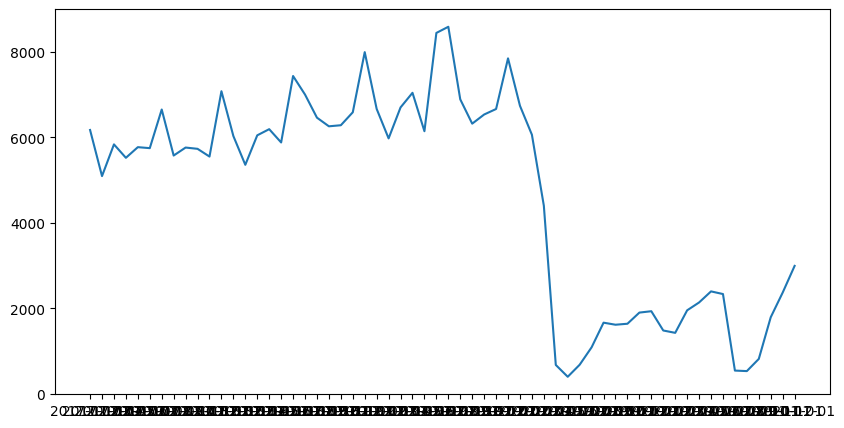

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

df = pd.read_csv(url)
plot(df['Waktu'],df['Data'])

data = df['Data'].values

## Training procedure

### Definition of the Universe of Discourse U & Linguistic variable creation

The Universe of Discourse (U) partitioners are responsible for identifying U, split the partitions and create their fuzzy sets. There are several ways to partition U and this has a direct impact on the accuracy of the predictive model.

For this example we are using grid partitioning, where all sets are equal. The default membership function is triangular.

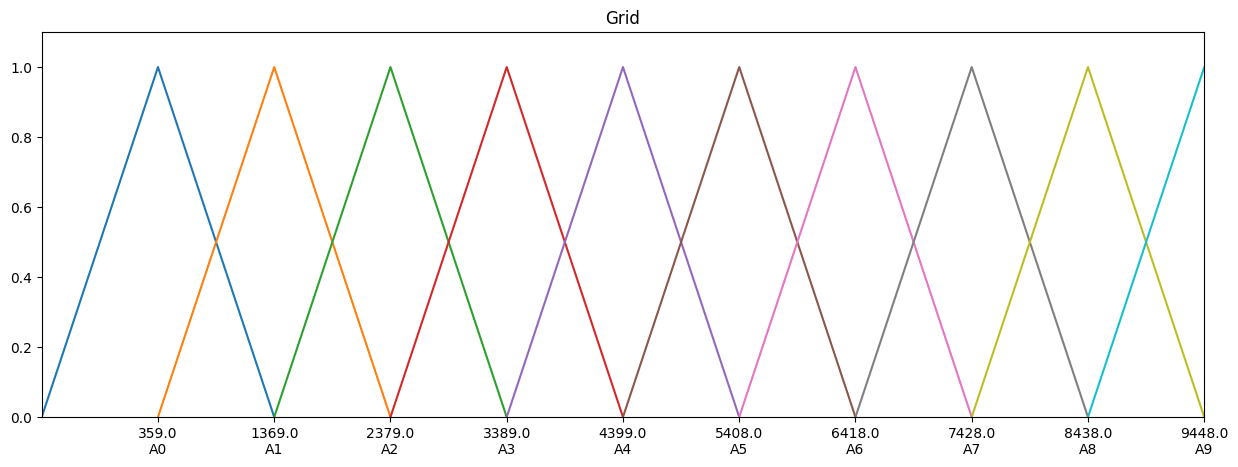

In [ ]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

### Fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [ ]:

fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A6',
 'A5',
 'A5',
 'A5',
 'A5',
 'A5',
 'A6',
 'A5',
 'A5',
 'A5',
 'A5',
 'A7',
 'A6',
 'A5',
 'A6',
 'A6',
 'A5',
 'A7',
 'A7',
 'A6',
 'A6',
 'A6',
 'A6',
 'A8',
 'A6',
 'A6',
 'A6',
 'A7',
 'A6',
 'A8',
 'A8',
 'A6',
 'A6',
 'A6',
 'A6',
 'A7',
 'A6',
 'A6',
 'A4',
 'A0',
 'A0',
 'A0',
 'A1',
 'A1',
 'A1',
 'A1',
 'A2',
 'A2',
 'A1',
 'A1',
 'A2',
 'A2',
 'A2',
 'A2',
 'A0',
 'A0',
 'A0',
 'A1',
 'A2',
 'A3']

### Temporal patterns

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [ ]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A6 -> A5', 'A5 -> A5', 'A5 -> A6', 'A5 -> A7', 'A7 -> A6', 'A6 -> A6', 'A7 -> A7', 'A6 -> A8', 'A8 -> A6', 'A6 -> A7', 'A8 -> A8', 'A6 -> A4', 'A4 -> A0', 'A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A1', 'A2 -> A0', 'A2 -> A3']


In [ ]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A4 -> A0
A0 -> A0,A1
A1 -> A1,A2
A2 -> A0,A1,A2,A3
A5 -> A5,A6,A7
A6 -> A4,A5,A6,A7,A8
A7 -> A6,A7
A8 -> A6,A8



##  Forecasting procedure

### Input value fuzzyfication

This is demo-only, and you do not need to explicitly run it. This entire process runs automatically within the fit function, which trains the model.

In [ ]:
fuzzyfied = fs.fuzzyfy(18876, method='maximum', mode='sets')

print(fuzzyfied)

A9


### Find the compatible rules & Defuzzyfy

In [ ]:
model.predict([18876])

[9447.900000000001]

## Model's in sample performance

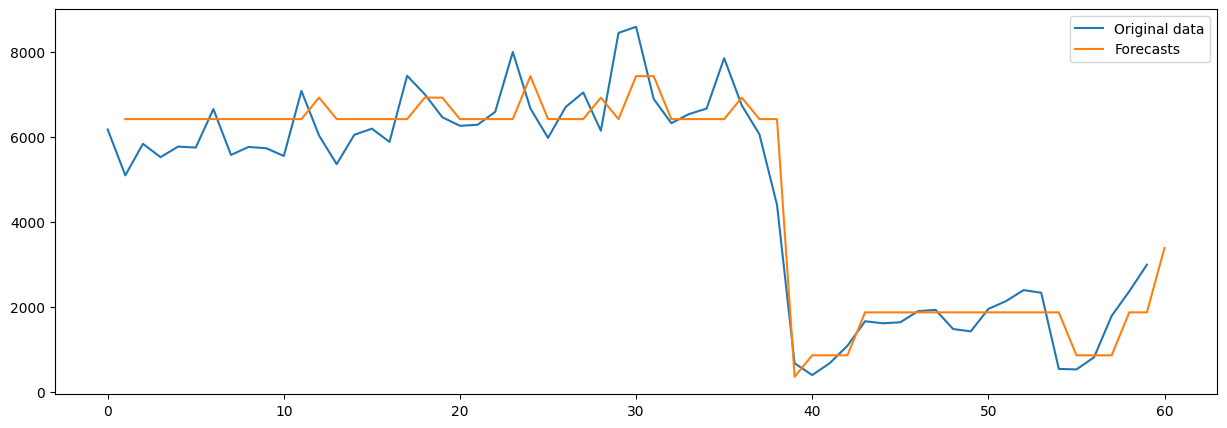

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])